## Logistische Regression 

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:


import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0, 0.5, 'y')

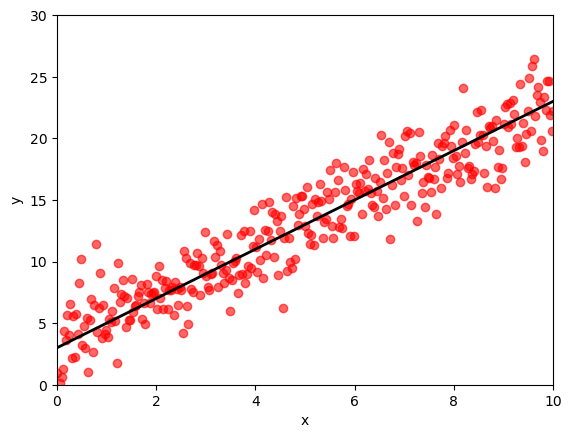

In [87]:
def line(a, b, x):
    return a*x+b
    
x = np.linspace(0, 10)
a = 2; b = 3
y = line(a, b, x)

size = 333
x_sample = np.linspace(0, 10, size)
y_sample = a * x_sample + b + np.random.normal(loc=0, scale=2, size=size)

plt.scatter(x_sample, y_sample, marker='o', alpha=0.6, c='r')
plt.plot(x, y, c='k', lw=2.)
plt.xlim(0, 10); plt.ylim(0, 30)
plt.xlabel('x'); plt.ylabel('y')


In [88]:
size = 1000
x_sample = np.linspace(0, 10, size)
x_class = np.linspace(0, 10, size)
y_class0 = np.array([r if r <= line(a, b, x) + 3 else -1 for x,r in zip(x_sample, 30 * np.random.uniform(size=size))])
y_class1 = np.array([r if r >= line(a, b, x) - 3 else -1 for x,r in zip(x_sample, 30 * np.random.uniform(size=size))])

Text(0, 0.5, 'y')

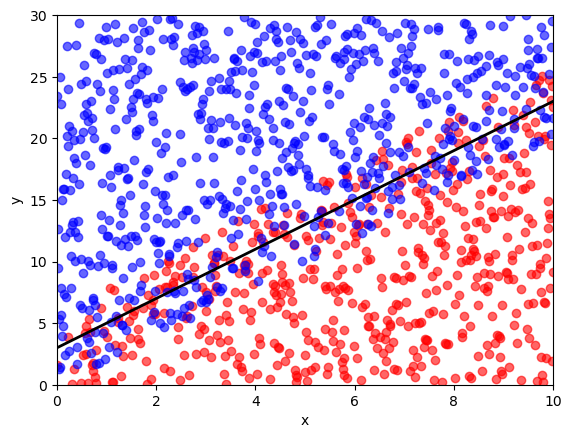

In [89]:
plt.scatter(x_class[:len(y_class0)], y_class0, 	marker='o',alpha=0.6, c='r')
plt.scatter(x_class[:len(y_class1)], y_class1, 	marker='o',alpha=0.6, c='b')
plt.plot(x, y, c='k', lw=2.)
plt.xlim(0, 10); plt.ylim(0, 30)
plt.xlabel('x'); plt.ylabel('y')

Text(0, 0.5, 'y')

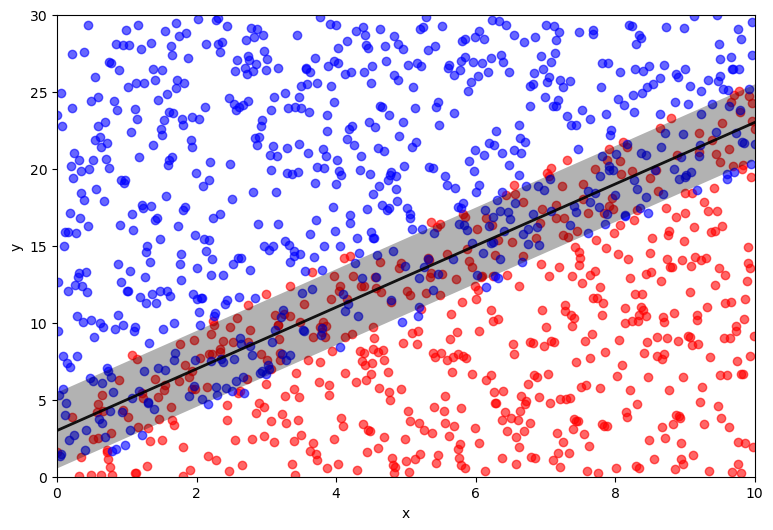

In [90]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(x_class,y_class0, marker='o',alpha=0.6, c='r')
plt.scatter(x_class,y_class1, marker='o',alpha=0.6, c='b')
plt.plot(x,y, c='k',lw=50.,alpha=0.3) # fat transparent line over opaque regression line
plt.plot(x,y, c='k',lw=2.,alpha=0.9) # regression line
plt.xlim(0,10)
plt.ylim(0,30)
plt.xlabel('x')
plt.ylabel('y')

[ 33  40  39  46  63  68  77  86 102 114 116 124 127 137 139 151 118  72
  74  81  77  69  39  12   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  3 11 50 79 75 69 63 68 74
 90 95 60 54 63 55 61 57 51 51 52 50 37 29 26 25]


(0.0, 1.01)

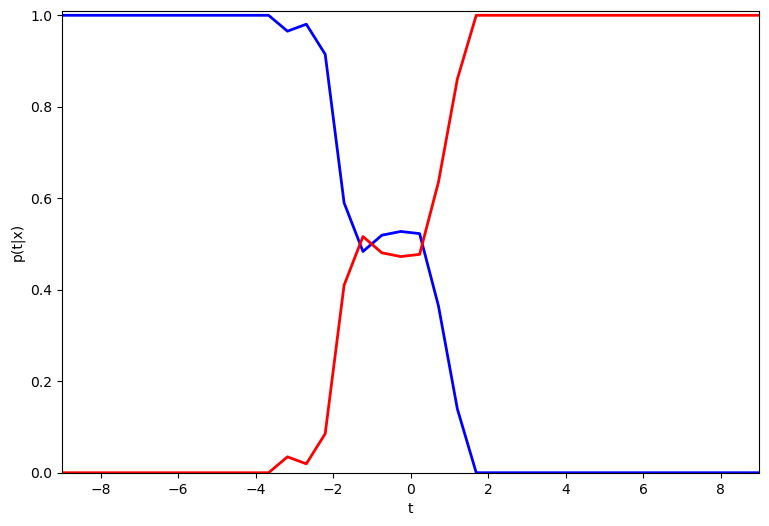

In [91]:
import math
from numpy.linalg import norm

tsize = 40 
t_sample = np.linspace(-10,9,tsize)
t_sample2 = t_sample + 1
def sign_(x,y,a,b): 
    if y > a*x+b:
        return 1
    else:
        return -1

def get_label_bin_p(d0,d1,a,b,x_class,y_class0,y_class1):
    pref1 = np.array([-10,a*(-10)+b])
    pref2 = np.array([10,a*10 + b])
    count_0 = 0
    count_1 = 0
    for ic,xc in enumerate(x_class):
        p3_0 = np.array([xc,y_class0[ic]])
        p3_1 = np.array([xc,y_class1[ic]])
        dc0 = norm(np.cross(pref2-pref1, pref1-p3_0))/norm(pref2-pref1)
        dc1 = norm(np.cross(pref2-pref1, pref1-p3_1))/norm(pref2-pref1)
        dc0_s = sign_(xc,y_class0[ic],a,b)
        dc1_s = sign_(xc,y_class1[ic],a,b)
        dc0 = dc0 * dc0_s
        dc1 = dc1 * dc1_s
        if dc0<d1 and dc0>d0:
            count_0 += 1
        if dc1<d1 and dc1>d0:
            #print(p3_1,dc1,dc1_s)
            count_1 += 1
    return count_0,count_1

p_0 = []
p_1 = []
for it,ts in enumerate(t_sample):
    c0,c1 = get_label_bin_p(ts,t_sample2[it],a,b,x_class,y_class0,y_class1)
    p_0.append(c0)
    p_1.append(c1)
p_0 = np.array(p_0)
p_1 = np.array(p_1)
p_1[:14] = 0
print(p_0)
print(p_1)

fig = plt.figure(1, figsize=(9, 6))

plt.plot(t_sample,p_0/(p_0+p_1), c='b',lw=2.)
plt.plot(t_sample,p_1/(p_0+p_1), c='r',lw=2.)
plt.xlabel('t')
plt.ylabel('p(t|x)')
plt.xlim(-9,9)
plt.ylim(0,1.01)

Text(0, 0.5, 'p(t|x)')

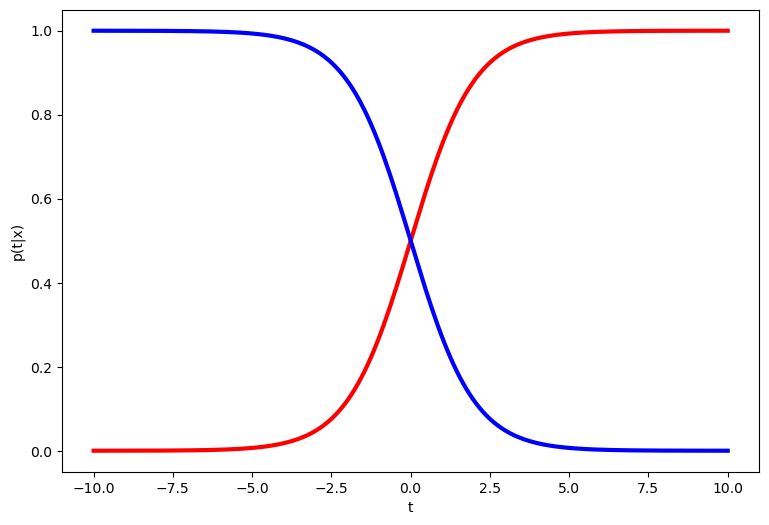

In [92]:
def logf(t):
    return 1./(1 + np.exp( -t ))


# In[33]:

fig = plt.figure(1, figsize=(9, 6))

t = np.linspace(-10,10,200) 
plt.plot(t,logf(t),lw=3.,c='r')
plt.plot(t,1-logf(t),lw=3.,c='b')
plt.xlabel('t')
plt.ylabel('p(t|x)')

Text(0, 0.5, 'logistic function(t)')

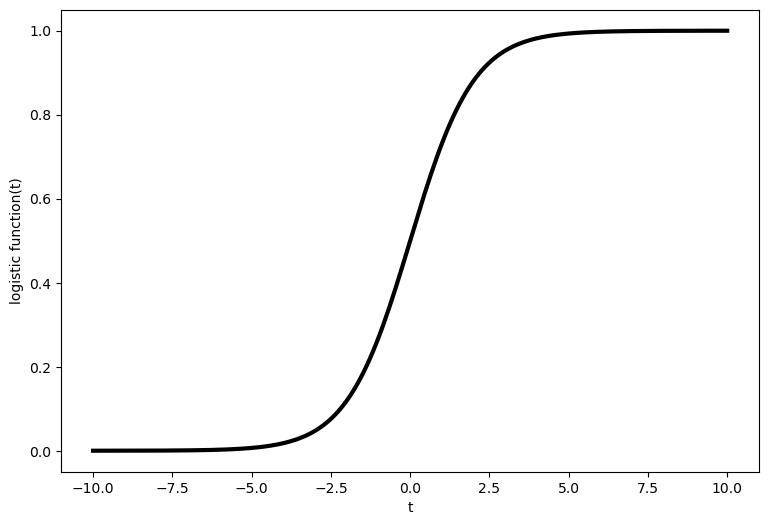

In [93]:
fig = plt.figure(1, figsize=(9, 6))

t = np.linspace(-10,10,200) 
plt.plot(t,logf(t),lw=3.,c='k')
plt.xlabel('t')
plt.ylabel('logistic function(t)')

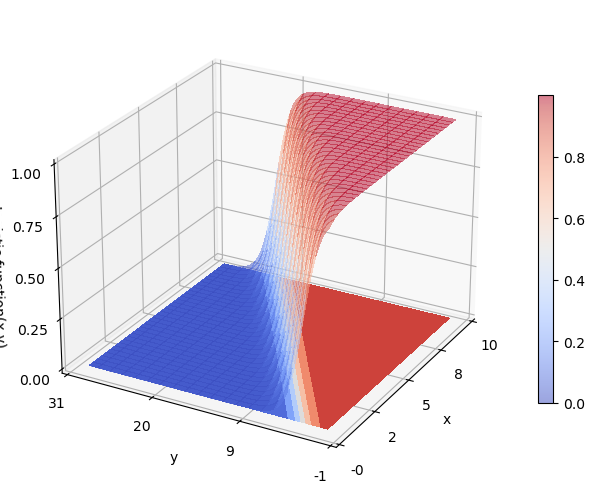

In [94]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
#import seaborn as sns

fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = Axes3D(fig)
fig.add_axes(ax)

def logf_z(p,q,X,Y):
    return (1./(1. + np.exp( -(p*X + q)  + Y )))
    
X = np.arange(0, 10., 0.1)
Y = np.arange(0., 30., 0.1)
X, Y = np.meshgrid(X,Y)

#Z = 1-logf_z(2,3,X,Y)
Z = logf_z(2,3,X,Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,  rstride=16, cstride=3, alpha=0.5,
                       linewidth=0, antialiased=False)


ax.set_zlim(0., 1.0)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('logistic function(x,y)')

ax.xaxis.set_major_locator(LinearLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.00f'))
ax.yaxis.set_major_locator(LinearLocator(4))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.00f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.64, aspect=20)

cset = ax.contourf(X, Y, Z, zdir='z', offset=0.001, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='x', offset=-10, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=30, cmap=cm.coolwarm)

#nsample = 1000
#ax.scatter(x_class[0:nsample],y_class0[0:nsample], marker='.',alpha=0.9, c='b')
#ax.scatter(x_class[0:nsample],y_class1[0:nsample], marker='.',alpha=0.9, c='g')

ax.view_init(25, -151)

plt.gcf().subplots_adjust(left=-0.25)
plt.gcf().subplots_adjust(bottom=-0.25)
#plt.xlabel('x')
#plt.ylabel('y')

In [95]:
import sklearn.linear_model as lm
logr = lm.LogisticRegression()

In [96]:

x1 = np.append(x_class[y_class0>=0], x_class[y_class1>=0])
x2 = np.append(y_class0[y_class0>=0], y_class1[y_class1>=0])
X = np.array([x1, x2]).T

# 0 is for class0, 1 for class1
y = np.append(np.zeros(len(y_class0[y_class0>=0])), np.ones(len(y_class1[y_class1>=0])))

In [97]:
logr.fit(X, y)

LogisticRegression()

In [98]:
logr.score(X, y)

0.8312858312858313

## Logistische Regression der Irisdaten

In [99]:
from sklearn.datasets import load_iris
iris = load_iris()

X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [100]:
import sklearn.linear_model as lm
logr = lm.LogisticRegression()
logr.fit(X,y)
logr.score(X,y)

0.9733333333333334

## Local Data with Pandas

In [101]:
import pandas as pd

In [102]:
iris_df = pd.read_csv('iris_cleaned.csv')
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [104]:
iris_df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

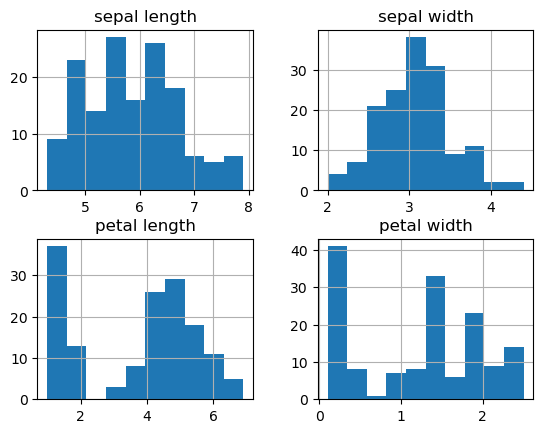

In [105]:
iris_df.hist()

Iris-setosa             Axes(0.1,0.559091;0.363636x0.340909)
Iris-versicolor    Axes(0.536364,0.559091;0.363636x0.340909)
Iris-virginica              Axes(0.1,0.15;0.363636x0.340909)
dtype: object

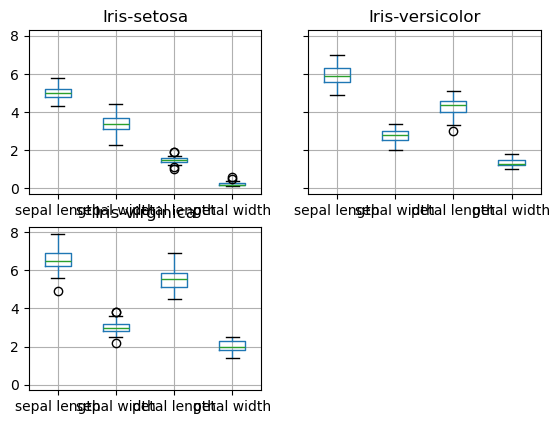

In [106]:
iris_df.groupby('class').boxplot()

In [109]:
category_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
numeric_values = iris_df["class"].map(category_mapping)
iris_df['target'] = numeric_values
iris_df.head()

,sepal length,sepal width,petal length,petal width,class,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [114]:
from sklearn.model_selection import train_test_split
X = iris_df[["sepal length", "sepal width", "petal length", "petal width"]]
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

In [118]:
import sklearn.linear_model as lm
lgr = lm.LogisticRegression()

In [119]:
lgr.fit(X_train, y_train)

LogisticRegression()

In [120]:
lgr.score(X_train, y_train)

0.9666666666666667

In [121]:
lgr.score(X_test, y_test)

0.95

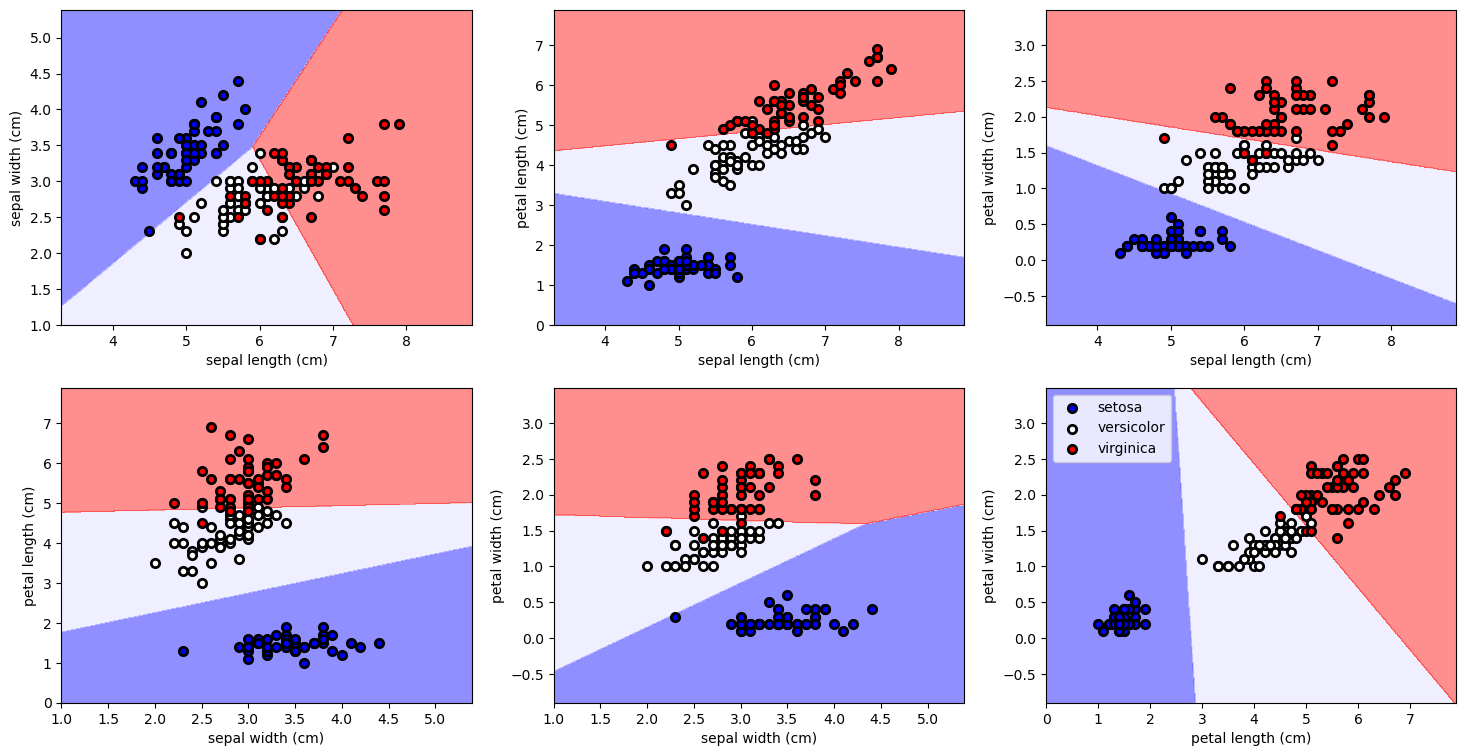

In [122]:
n_classes = 3
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow
plot_step = 0.01

fig = plt.figure(1, figsize=(18, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = logr.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', lw=2, label=iris.target_names[i],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left');

In [127]:
for pair in [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]:
    X = iris.data[:, pair]
    y = iris.target

    logrfit = logr.fit(X, y)
    print(logr.score(X, y))

0.82
0.96
0.96
0.9533333333333334
0.96
0.9666666666666667


In [128]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [129]:
X = iris.data[:, [0,1]]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,